In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from tqdm import tqdm
import time 
from bertram0_functions import simulate_ou_first_passage
from bertram0_functions import phi1, phi2, INF, psi
from bertram0_functions import expected_trade_length, variance_trade_length


# a -> b: t1
# b -> a: t2
# t1 + t2 = T
a = 0
b = -0.3
n = 10000
t0 = time.time()
m, v, n_check = simulate_ou_first_passage(a, b, 10, n)
print(f"E[T] = {m:.5f}")
print(f"V[T] = {v:.5f}")
print(f"n_check = {n_check}")
t1 = time.time()
print(f"time = {t1-t0:.5f} seconds")

E[T] = 0.41817
V[T] = 0.63369
n_check = 1
time = 1.55667 seconds


100%|██████████| 10/10 [00:21<00:00,  2.18s/it]


<Axes: title={'center': 'First passage time'}, xlabel='target level', ylabel='E[T]'>

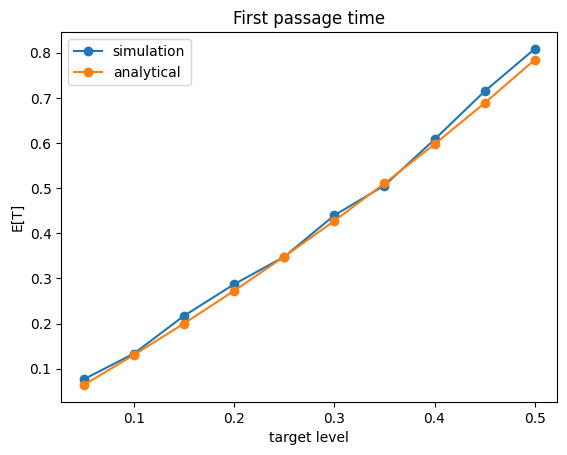

In [2]:
#Compare simulation and analytical results
t0 = time.time()
exp_times = pd.DataFrame(columns=["simulation", "analytical"])
for b in tqdm(np.linspace(0.05, 0.5, 10)):
    m, v, n_check = simulate_ou_first_passage(0, b, 10, n)
    exp_t = phi1(b) - phi1(0)
    exp_times.loc[b] = [m, exp_t]
    # print(f"b = {b:.2f}, time = {time.time() - t0:.5f} seconds")

exp_times.plot(marker="o", linestyle="-", xlabel="target level", ylabel="E[T]", title="First passage time")

시뮬레이션으로 구한게 파란색 시간. 

analytical 하게 구한거랑 근접하게 간다. 

simulation이 조~금 더 높은데, simulation이 discrete하게 들어가니까 약간의 오차가 생기는 것. 

시간 간격 사이에 touch 했을 수 있는데 그것이 count 안되는 경우도 생겨서. 

In [3]:
b = 0.3
#Analytical results
exp_t1 = phi1(b) - phi1(a)
exp_t2 = phi1(-a) - phi1(-b)
var_t1 = phi1(b)**2 - phi2(b) + phi2(a) - phi1(a)**2 
var_t2 = phi1(-a)**2 - phi2(-a) + phi2(-b) - phi1(-b)**2
print(f"(A) {a} -> (B) {b} -> (A) {a}")
print(f"E[t1] = {exp_t1:.5f}, E[t2] = {exp_t2:.5f}, E[T] = {exp_t1 + exp_t2:.5f}")
print(f"V[t1] = {var_t1:.5f}, V[t2] = {var_t2:.5f}, V[T] = {var_t1 + var_t2:.5f}")

(A) 0 -> (B) 0.3 -> (A) 0
E[t1] = 0.42739, E[t2] = 0.33603, E[T] = 0.76342
V[t1] = 0.69966, V[t2] = 0.40545, V[T] = 1.10511


In [4]:
#Trade length distribution
print(f"(A) {a} -> (B) {b} -> (A) {a}")
Et = expected_trade_length(a, b)
Vt = variance_trade_length(a, b)
print(f"E[T] = {Et:.5f}")
print(f"V[T] = {Vt:.5f}")



(A) 0 -> (B) 0.3 -> (A) 0
E[T] = 0.76342
V[T] = 1.10511


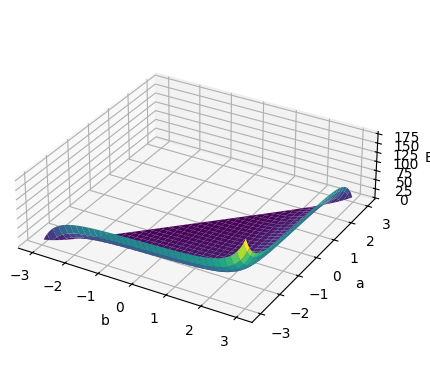

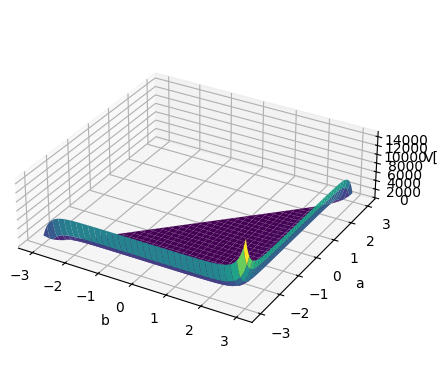

In [5]:
aa = np.linspace(-3, 3, 101)
bb = np.linspace(-3, 3, 101)
Et_list = np.ones((len(aa), len(bb))) * np.nan
Vt_list = np.ones((len(aa), len(bb))) * np.nan
for i, a in enumerate(aa):
    for j, b in enumerate(bb):
        if b>a:
            Et = expected_trade_length(a, b)
            Vt = variance_trade_length(a, b)
            Et_list[i, j] = Et
            Vt_list[i, j] = Vt

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
bb2, aa2 = np.meshgrid(bb, aa)
ax.plot_surface(bb2, aa2, Et_list, cmap="viridis")
ax.set_xlabel('b')
ax.set_ylabel('a')
ax.set_zlabel('E[T]')
ax.set_box_aspect([1, 1, 0.3])
plt.show()



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(bb2, aa2, Vt_list, cmap="viridis")
ax.set_xlabel('b')
ax.set_ylabel('a')
ax.set_zlabel('V[T]')
ax.set_box_aspect([1, 1, 0.3])
plt.show()

a 에서 진입, b에서 청산. 